In [396]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [397]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [398]:
NUM_CLASSES = 16

# Dataset reading

In [399]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21*2 + 21*2 + 2*1) + 1)))

In [400]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [401]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [402]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

In [403]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2 + 21*2 + 2*1 )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [404]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_36 (Dropout)        (None, 86)                0         
                                                                 
 dense_54 (Dense)            (None, 100)               8700      
                                                                 
 dropout_37 (Dropout)        (None, 100)               0         
                                                                 
 dense_55 (Dense)            (None, 50)                5050      
                                                                 
 dense_56 (Dense)            (None, 16)                816       
                                                                 
Total params: 14566 (56.90 KB)
Trainable params: 14566 (56.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [405]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [406]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [407]:
model.fit(
    X_train,
    y_train,
    epochs=100*NUM_CLASSES,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1600
 7/11 [==================>...........] - ETA: 0s - loss: 2.8442 - accuracy: 0.0815 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 3s 65ms/step - loss: 2.7982 - accuracy: 0.0913 - val_loss: 2.5733 - val_accuracy: 0.0935
Epoch 2/1600
 9/11 [=======================>......] - ETA: 0s - loss: 2.5441 - accuracy: 0.1632

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 23ms/step - loss: 2.5271 - accuracy: 0.1696 - val_loss: 2.3570 - val_accuracy: 0.3152
Epoch 3/1600
 7/11 [==================>...........] - ETA: 0s - loss: 2.3506 - accuracy: 0.2478
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 23ms/step - loss: 2.3265 - accuracy: 0.2449 - val_loss: 2.1536 - val_accuracy: 0.3326
Epoch 4/1600
 6/11 [===============>..............] - ETA: 0s - loss: 2.1798 - accuracy: 0.2747
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 23ms/step - loss: 2.1623 - accuracy: 0.2746 - val_loss: 1.9290 - val_accuracy: 0.4283
Epoch 5/1600
 9/11 [=======================>......] - ETA: 0s - loss: 1.9692 - accuracy: 0.3359
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==========

 8/11 [====================>.........] - ETA: 0s - loss: 0.4694 - accuracy: 0.8447
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 25ms/step - loss: 0.4720 - accuracy: 0.8449 - val_loss: 0.2280 - val_accuracy: 0.9130
Epoch 30/1600
 6/11 [===============>..............] - ETA: 0s - loss: 0.4474 - accuracy: 0.8398
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 24ms/step - loss: 0.4531 - accuracy: 0.8355 - val_loss: 0.2222 - val_accuracy: 0.9196
Epoch 31/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.4547 - accuracy: 0.8350
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 22ms/step - loss: 0.4667 - accuracy: 0.8283 - val_loss: 0.2139 - val_accuracy: 0.9478
Epoch 32/1600
 9/11 [=======================>......] - ETA: 0s - loss: 0.4145 - accuracy: 0.8490
Epoch

Epoch 56/1600
11/11 [==============================] - ETA: 0s - loss: 0.3089 - accuracy: 0.8746
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 20ms/step - loss: 0.3089 - accuracy: 0.8746 - val_loss: 0.1401 - val_accuracy: 0.9326
Epoch 57/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.3005 - accuracy: 0.8857
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 20ms/step - loss: 0.3033 - accuracy: 0.8862 - val_loss: 0.1402 - val_accuracy: 0.9500
Epoch 58/1600
 9/11 [=======================>......] - ETA: 0s - loss: 0.2921 - accuracy: 0.8880
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 21ms/step - loss: 0.2853 - accuracy: 0.8935 - val_loss: 0.1368 - val_accuracy: 0.9652
Epoch 59/1600
11/11 [==============================] - ETA: 0s - loss: 0.2772 - accuracy

Epoch 83/1600
11/11 [==============================] - ETA: 0s - loss: 0.2065 - accuracy: 0.9210
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 19ms/step - loss: 0.2065 - accuracy: 0.9210 - val_loss: 0.1184 - val_accuracy: 0.9543
Epoch 84/1600
10/11 [==========================>...] - ETA: 0s - loss: 0.2279 - accuracy: 0.9086
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 17ms/step - loss: 0.2242 - accuracy: 0.9109 - val_loss: 0.1167 - val_accuracy: 0.9478
Epoch 85/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.2165 - accuracy: 0.9092
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 21ms/step - loss: 0.2140 - accuracy: 0.9145 - val_loss: 0.1139 - val_accuracy: 0.9587
Epoch 86/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.2369 - accuracy

Epoch 110/1600
10/11 [==========================>...] - ETA: 0s - loss: 0.1935 - accuracy: 0.9258
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 20ms/step - loss: 0.1928 - accuracy: 0.9239 - val_loss: 0.1095 - val_accuracy: 0.9457
Epoch 111/1600
10/11 [==========================>...] - ETA: 0s - loss: 0.1867 - accuracy: 0.9273
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 19ms/step - loss: 0.1844 - accuracy: 0.9275 - val_loss: 0.1034 - val_accuracy: 0.9696
Epoch 112/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.1741 - accuracy: 0.9404
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 20ms/step - loss: 0.1730 - accuracy: 0.9406 - val_loss: 0.1043 - val_accuracy: 0.9587
Epoch 113/1600
11/11 [==============================] - ETA: 0s - loss: 0.2015 - a

Epoch 137/1600
 7/11 [==================>...........] - ETA: 0s - loss: 0.1778 - accuracy: 0.9342
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 24ms/step - loss: 0.1681 - accuracy: 0.9370 - val_loss: 0.0950 - val_accuracy: 0.9630
Epoch 138/1600
 7/11 [==================>...........] - ETA: 0s - loss: 0.1682 - accuracy: 0.9319
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 25ms/step - loss: 0.1782 - accuracy: 0.9304 - val_loss: 0.0934 - val_accuracy: 0.9630
Epoch 139/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.1716 - accuracy: 0.9277
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 23ms/step - loss: 0.1774 - accuracy: 0.9268 - val_loss: 0.0948 - val_accuracy: 0.9630
Epoch 140/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.1706 - a

Epoch 164/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.1530 - accuracy: 0.9424
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 24ms/step - loss: 0.1500 - accuracy: 0.9428 - val_loss: 0.0844 - val_accuracy: 0.9696
Epoch 165/1600
 7/11 [==================>...........] - ETA: 0s - loss: 0.1849 - accuracy: 0.9241
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 24ms/step - loss: 0.1817 - accuracy: 0.9254 - val_loss: 0.0856 - val_accuracy: 0.9739
Epoch 166/1600
 7/11 [==================>...........] - ETA: 0s - loss: 0.1645 - accuracy: 0.9208
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 23ms/step - loss: 0.1542 - accuracy: 0.9297 - val_loss: 0.0837 - val_accuracy: 0.9783
Epoch 167/1600
 9/11 [=======================>......] - ETA: 0s - loss: 0.1827 - a

Epoch 191/1600
 7/11 [==================>...........] - ETA: 0s - loss: 0.1618 - accuracy: 0.9397
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 25ms/step - loss: 0.1526 - accuracy: 0.9428 - val_loss: 0.0783 - val_accuracy: 0.9739
Epoch 192/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.1093 - accuracy: 0.9648
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 25ms/step - loss: 0.1267 - accuracy: 0.9551 - val_loss: 0.0733 - val_accuracy: 0.9804
Epoch 193/1600
 9/11 [=======================>......] - ETA: 0s - loss: 0.1288 - accuracy: 0.9505
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 22ms/step - loss: 0.1250 - accuracy: 0.9529 - val_loss: 0.0754 - val_accuracy: 0.9739
Epoch 194/1600
 7/11 [==================>...........] - ETA: 0s - loss: 0.1517 - a

Epoch 218/1600
 7/11 [==================>...........] - ETA: 0s - loss: 0.1375 - accuracy: 0.9487
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 23ms/step - loss: 0.1259 - accuracy: 0.9536 - val_loss: 0.0706 - val_accuracy: 0.9696
Epoch 219/1600
 9/11 [=======================>......] - ETA: 0s - loss: 0.1224 - accuracy: 0.9514
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 21ms/step - loss: 0.1277 - accuracy: 0.9500 - val_loss: 0.0670 - val_accuracy: 0.9804
Epoch 220/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.1288 - accuracy: 0.9521
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 22ms/step - loss: 0.1270 - accuracy: 0.9514 - val_loss: 0.0714 - val_accuracy: 0.9674
Epoch 221/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.1313 - a

Epoch 245/1600
 9/11 [=======================>......] - ETA: 0s - loss: 0.1306 - accuracy: 0.9514
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 23ms/step - loss: 0.1310 - accuracy: 0.9514 - val_loss: 0.0637 - val_accuracy: 0.9848
Epoch 246/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.1409 - accuracy: 0.9443
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 23ms/step - loss: 0.1428 - accuracy: 0.9435 - val_loss: 0.0613 - val_accuracy: 0.9891
Epoch 247/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.1331 - accuracy: 0.9521
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 23ms/step - loss: 0.1340 - accuracy: 0.9493 - val_loss: 0.0652 - val_accuracy: 0.9826
Epoch 248/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.1155 - a

Epoch 272/1600
 9/11 [=======================>......] - ETA: 0s - loss: 0.1173 - accuracy: 0.9566
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 22ms/step - loss: 0.1151 - accuracy: 0.9558 - val_loss: 0.0608 - val_accuracy: 0.9848
Epoch 273/1600
10/11 [==========================>...] - ETA: 0s - loss: 0.1212 - accuracy: 0.9563
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 27ms/step - loss: 0.1259 - accuracy: 0.9551 - val_loss: 0.0608 - val_accuracy: 0.9848
Epoch 274/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.1218 - accuracy: 0.9541
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 22ms/step - loss: 0.1205 - accuracy: 0.9536 - val_loss: 0.0589 - val_accuracy: 0.9891
Epoch 275/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.1070 - a

Epoch 299/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.1202 - accuracy: 0.9541
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 22ms/step - loss: 0.1156 - accuracy: 0.9551 - val_loss: 0.0591 - val_accuracy: 0.9913
Epoch 300/1600
 8/11 [====================>.........] - ETA: 0s - loss: 0.1096 - accuracy: 0.9561
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 21ms/step - loss: 0.1092 - accuracy: 0.9536 - val_loss: 0.0626 - val_accuracy: 0.9739
Epoch 301/1600
 9/11 [=======================>......] - ETA: 0s - loss: 0.1258 - accuracy: 0.9401
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
11/11 [==============================] - 0s 21ms/step - loss: 0.1258 - accuracy: 0.9457 - val_loss: 0.0546 - val_accuracy: 0.9891
Epoch 302/1600
 9/11 [=======================>......] - ETA: 0s - loss: 0.1137 - a

In [408]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 [==============================] - 0s 6ms/step - loss: 0.0551 - accuracy: 0.9870


In [409]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [410]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 144ms/step
[9.7152397e-10 8.5368491e-08 1.3328140e-06 4.0559597e-10 4.0408407e-10
 3.2463390e-07 1.6293487e-11 1.0514306e-08 1.1652314e-08 1.1918551e-14
 2.5353154e-13 4.2473059e-16 5.0828568e-08 9.9405551e-01 5.9426753e-03
 7.0111486e-09]
13


# Confusion matrix

15/15 [==============================] - 0s 3ms/step


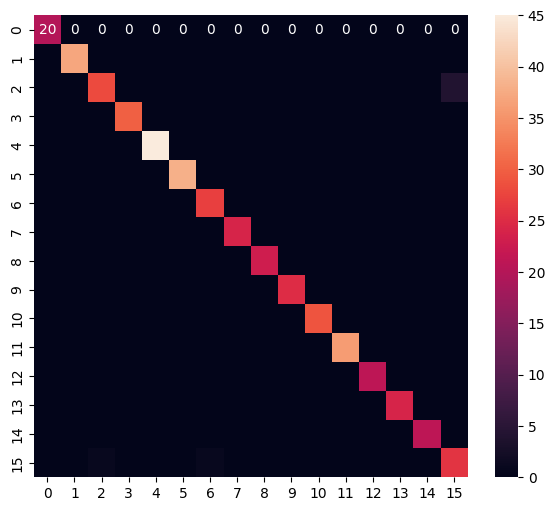

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        37
           2       0.97      0.88      0.92        32
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        45
           5       1.00      1.00      1.00        38
           6       0.96      1.00      0.98        27
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        23
           9       1.00      1.00      1.00        25
          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        36
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        21
          15       0.87      0.93      0.90        28

    accuracy                           0.99       460
   m

In [411]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [412]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\Sanjay\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [413]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmps3p1np21\assets


INFO:tensorflow:Assets written to: C:\Users\Sanjay\AppData\Local\Temp\tmps3p1np21\assets


19752

# Inference test

In [414]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [415]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [416]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [417]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [418]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.75367231e-10 8.46445403e-08 1.29908676e-06 3.95495081e-10
 4.01897959e-10 2.96497205e-07 1.72557611e-11 1.02990683e-08
 1.11375416e-08 1.14004502e-14 2.34148963e-13 3.56387577e-16
 4.38876384e-08 9.94231761e-01 5.76656032e-03 6.78116896e-09]
13
